## Van der Pohls euqation
https://en.wikipedia.org/wiki/Van_der_Pol_oscillator

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

saveFigure = False

def vdp(t, y, la):
    return [y[1], la*(1-y[0]**2)*y[1]-y[0]]

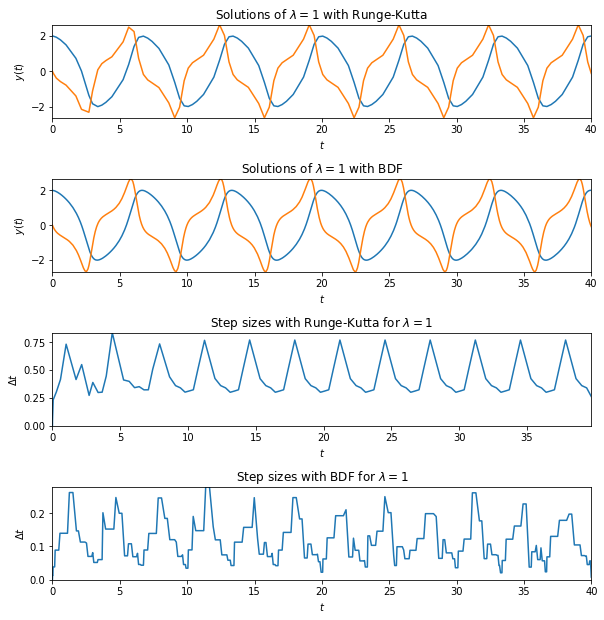

In [2]:
t_span = (0, 40)

y0 = [2, 0]
la = 1

# Solve for Van der Pohls equation
sol_RK = solve_ivp(lambda t,y: vdp(t,y,la), t_span, y0, method='RK45' )
sol_BDF = solve_ivp(lambda t,y: vdp(t,y,la), t_span, y0, method='BDF' )

# Plot
fig, axs = plt.subplots(4, 1, figsize=(8, 8))
fig.tight_layout(pad=0, w_pad=0, h_pad=4)

ax =axs[0]
ax.plot(sol_RK.t,sol_RK.y[0].T )
ax.plot(sol_RK.t,sol_RK.y[1].T )
ax.autoscale(enable=True, axis='both', tight=True)
ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solutions of $\lambda=$' + str(la) + ' with Runge-Kutta')

ax =axs[1]
ax.plot(sol_BDF.t,sol_BDF.y[0].T )
ax.plot(sol_BDF.t,sol_BDF.y[1].T )
ax.autoscale(enable=True, axis='both', tight=True)
ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solutions of $\lambda=$' + str(la) + ' with BDF')

ax =axs[2]
ax.plot(sol_RK.t[0:-1], np.diff(sol_RK.t), )
ax.autoscale(enable=True, axis='both', tight=True)
ax.set_ylabel(r'$\Delta t$')
ax.set_xlabel(r'$t$')
ax.set_title('Step sizes with Runge-Kutta for $\lambda=$' + str(la))

ax =axs[3]
ax.plot(sol_BDF.t[0:-1], np.diff(sol_BDF.t), )
ax.autoscale(enable=True, axis='both', tight=True)
ax.set_ylabel(r'$\Delta t$')
ax.set_xlabel(r'$t$')
ax.set_title('Step sizes with BDF for $\lambda=$' + str(la))

if saveFigure:
    filename = 'vdp_la'+str(la)+'.pdf'
    fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')

## Satellites Orbit

Text(0.5,0,'$x$')

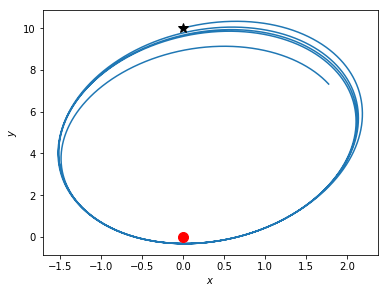

In [10]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def satellite(t, y, k):
    sqt = (y[0]**2+y[1]**2)**(-1.5)
    return [y[2], y[3], -k*y[0]*sqt, -k*y[1]*sqt]
a = 0
b = 10

y0 = [a, b, 0.25, 0.25]
k = 10
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve for orbiting equation
sol = solve_ivp(lambda t,y: satellite(t,y,k), t_span, y0, 
                method='RK45', t_eval=t_eval)
fig, ax = plt.subplots(1, figsize=(6, 4.5))

ax.plot(sol.y[0].T,sol.y[1].T )
ax.plot(0, 0, 'ro', markersize=10)
ax.plot(a, b, 'k*', markersize=10)

ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')

## Stability Region

### Explicit

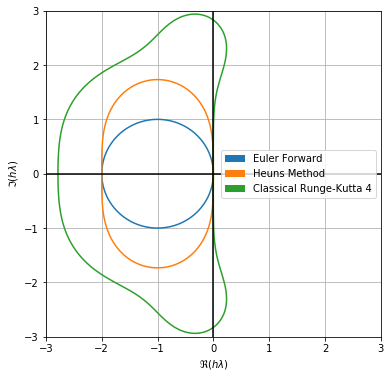

In [4]:
# Grid
nx, ny = (100, 100)
x = np.linspace(-3, 3, nx)
y = np.linspace(-3, 3, ny)
X, Y = np.meshgrid(x, y)
Z = X + Y*1j

# Euler Forward
EulerF = abs(1+Z)

# Heun's method
Heuns = abs(0.5*((Z+1)**2+1))

# Runge-Kutta 4
RK4 = abs(1+Z+0.5*Z**2+Z**3/6+Z**4/24)

# Plot
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.contour(X, Y, EulerF, levels = [1], colors='C0')
ax.contour(X, Y, Heuns, levels = [1], colors='C1')
ax.contour(X, Y, RK4, levels = [1], colors='C2')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel(r'$\Re(h\lambda)$')
ax.set_ylabel(r'$\Im(h\lambda)$')

proxy = [plt.Rectangle((0,0),1,1,fc ='C'+str(pc))  for pc in range(3)]
plt.legend(proxy, ['Euler Forward', 'Heuns Method', 'Classical Runge-Kutta 4'], loc='center right')

if saveFigure:
    filename = 'Explicit.pdf'
    fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')

### Implicit

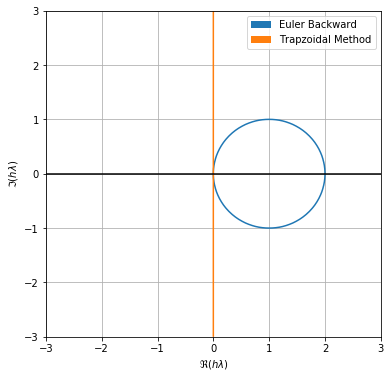

In [5]:
# Euler Backward
EulerBack = abs(1/(1-Z))

# Trapzoidal method
Trap = abs((2+Z)/(2-Z))

# Plot
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.contour(X, Y, EulerBack, levels = [1], colors='C0')
ax.contour(X, Y, Trap, levels = [1], colors='C1')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.grid(True)
ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')
ax.set_xlabel(r'$\Re(h\lambda)$')
ax.set_ylabel(r'$\Im(h\lambda)$')

proxy = [plt.Rectangle((0,0),1,1,fc ='C'+str(pc))  for pc in range(3)]
plt.legend(proxy, ['Euler Backward', 'Trapzoidal Method'], loc='upper right')

if saveFigure:
    filename = 'Implicit.pdf'
    fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')

### BDF methods

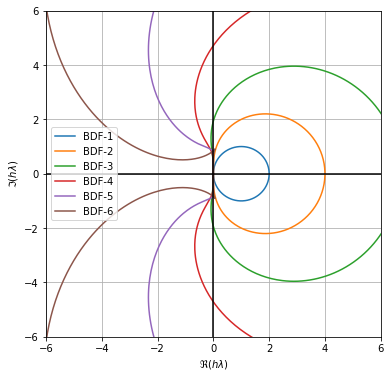

In [6]:
n = 500
z = np.linspace(0, n-1, n)
z = z * 2 *np.pi/n

z = np.exp(z*1j)

# BDF methods
d = 1 - 1.0/z
r = 0
fig, ax = plt.subplots(1, figsize=(6, 6))
# Bdf 1 to 6
for i in range(6):
    r = r + (d**(i+1))/(i+1)
    ax.plot(r.real, r.imag, label='BDF-'+str(i+1))

ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel(r'$\Re(h\lambda)$')
ax.set_ylabel(r'$\Im(h\lambda)$')
plt.legend()

if saveFigure:
    filename = 'BDF.pdf'
    fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')

# Zoom in 
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

if saveFigure:
    filename = 'BDF_zoom.pdf'
    fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')

## $\theta$-method

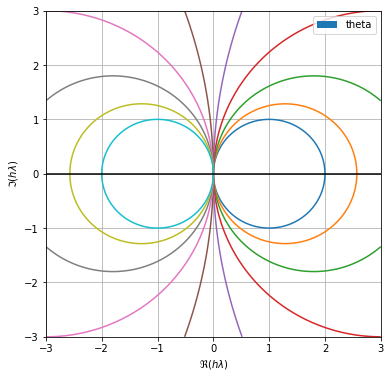

In [7]:
#  
nt = 10
ths = np.linspace(0, 1, nt)

# Plot
fig, ax = plt.subplots(1, figsize=(6, 6))
for i in range(nt):
    theta = abs((1-(1-ths[i])*Z)/(1+ths[i]*Z))
    ax.contour(X, Y, theta, levels = [1], colors='C'+str(i))
    
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.grid(True)
ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')
ax.set_xlabel(r'$\Re(h\lambda)$')
ax.set_ylabel(r'$\Im(h\lambda)$')

proxy = [plt.Rectangle((0,0),1,1,fc ='C'+str(pc))  for pc in range(3)]
plt.legend(proxy, ['theta'], loc='upper right')

# if saveFigure:
#     filename = 'Implicit.pdf'
#     fig.savefig(filename, format='pdf', dpi=1000, bbox_inches='tight')

## Reaction problem

In [8]:
def reaction(t, y, s, q, w):
    return [s*(y[1]-y[0]*y[1]+y[0]-q*y[0]*y[0]),
           1.0/s*(-y[1]-y[0]*y[1]+y[2]),
           w*(y[0]-y[2])]

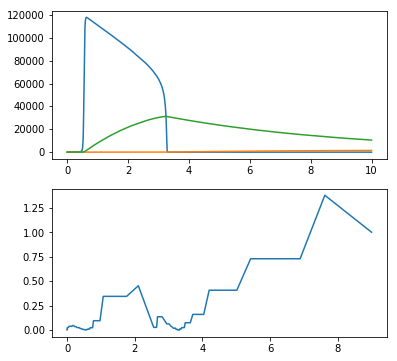

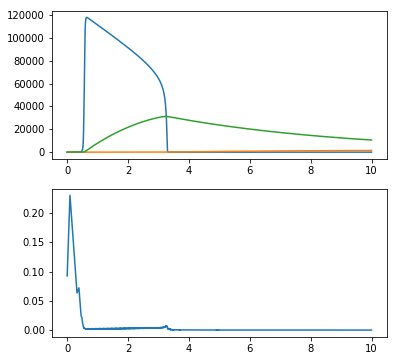

In [9]:
# Time interval for the simulation
t0 = 0
t1 = 10
t_span = (t0, t1)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Initial conditions, e.g. number of predator and prey at time zero
alpha0 = 30
beta0 = 1
gamma0 = 30
y0 = [alpha0, beta0, gamma0]

# Set parameters 
s = 77.27;   
w = 0.161; 
q = 8.375e-6; 

# Solve for Van der Pohls equation
sol_BDF = solve_ivp(lambda t,y: reaction(t, y, s, q, w), 
                t_span, y0, method='BDF')

sol_RK = solve_ivp(lambda t,y: reaction(t, y, s, q, w), 
                t_span, y0, method='RK45')

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(sol_BDF.t, sol_BDF.y.T)
ax[1].plot(sol_BDF.t[0:-1], np.diff(sol_BDF.t))

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(sol_RK.t, sol_RK.y.T)
ax[1].plot(sol_RK.t[0:-1], np.diff(sol_RK.t))